In [5]:
import random
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from convnets.utilities import utils
import talos


In [2]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = '/home/mksnkv/Documents/classification/passport_2class_divided_small/train'
validation_data_dir = '/home/mksnkv/Documents/classification/passport_2class_divided_small/validation'

weigths_path = '/home/mksnkv/models/top_tuned/mobilenetV2_test.h5'
structure_path = '/home/mksnkv/models/top_tuned/mobilenetV2_test.json'
nb_train_samples = 1000
nb_validation_samples = 300
nb_evaluation_samples = 560
epochs = 100
batch_size = 1

In [8]:
def mishas_model_for_diploma():
    model = Sequential()
    base_model = mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3), alpha=1.0, include_top=False, weights='imagenet');
    
#     model.add(base_model)
#     model.add(GlobalAveragePooling2D())
#     model.add(Dense(1, activation='sigmoid'))
    
    
    print(len(base_model.layers))
    for layer in base_model.layers[:152]:
        layer.trainable = False
    for layer in base_model.layers:
        print(layer.trainable)
    base_model.summary()

#     model.compile(optimizer='params['optimizer']',
#                   loss=params['losses'],
#                   metrics=['accuracy'])

#     history = model.fit(X_train, y_train,
#                         validation_data=[x_val, y_val],
#                         epochs=params['epochs'],
#                         batch_size=params['batch_size'],
#                         callbacks=[talos.utils.live()],
#                         verbose=0)
    return model


In [9]:
model = mishas_model_for_diploma()

155
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
Model: "mobilenetv2_1.00_224"
_______________________________________

In [4]:
train_generator, val_generator = utils.init_generators(train_data_dir,
                                                       validation_data_dir,
                                                       img_width,
                                                       img_height,
                                                       1000,
                                                       300)

Found 1000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [5]:
X_train, y_train = train_generator.next()
X_val, y_val = val_generator.next()
# X_train, y_train = [], []
# i = 0
# 

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1000, 224, 224, 3)
(1000,)
(300, 224, 224, 3)
(300,)


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1000, 224, 224, 3)
(1000,)
(300, 224, 224, 3)
(300,)


In [8]:
# for x in range(1000):
#     elem = train_generator.next()
#     X_train.append(elem[0])
#     y_train.append(elem[1])
#     print(x)
# 

In [9]:
# import numpy as np
# 

In [10]:
# y_train = [int(x) for x in y_train]
# y_train = np.array(y_train)

# Hyperparameter optimization

In [ ]:
p = {'batch_size': [10, 20, 30],
     'epochs': [20],
     'lr':(0.5, 5, 10),
     'optimizer': ['RMSProp', 'Adam'],
     'losses': ['binary_crossentropy'],
     #'activation':['relu', 'elu'],
     'last_activation': ['sigmoid']}

In [11]:
t = talos.Scan(x=X_train,
               y=y_train,
               x_val=X_val,
               y_val=y_val,
               model=mishas_model_for_diploma, 
               params=p,
               experiment_name="le misha's diploma")


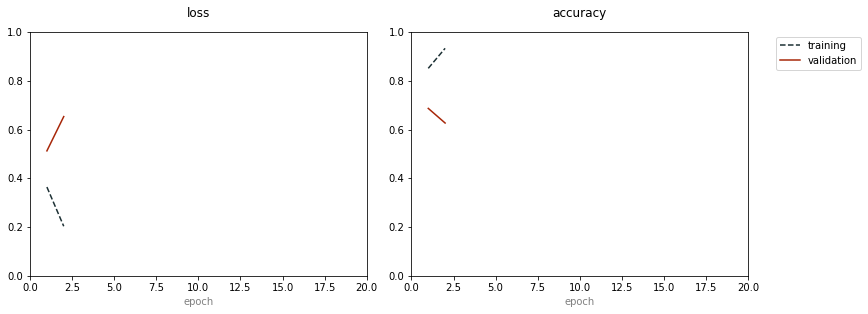

In [ ]:
t = talos.Scan(x=X_train,
               y=y_train,
               x_val=X_val,
               y_val=y_val,
               model=mishas_model_for_diploma, 
               params=p,
               experiment_name="le misha's diploma")
